# Simple Word Frequency List and Word Cloud

### by Eko Saputro

This project is just an example of how to make a simple word frequency list and word cloud from a text. I use an article from Harvard Business Review about "The Sexiest Job of the 21st Century" as text data. You can see the original article here and the text data here. We gonna use Counter package to make frequency list and WordCloud package to make a word cloud.

First, we have to import libraries that are necessary.

In [1]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

And read the text data

In [2]:
text = open('HBR_Sexiest_Job_21stCentury.txt').read()

In [3]:
print(text)

When Jonathan Goldman arrived for work in June 2006 at LinkedIn, the business networking site, the place still felt like a start-up. The company had just under 8 million accounts, and the number was growing quickly as existing members invited their friends and colleagues to join. But users weren't seeking out connections with the people who were already on the site at the rate executives had expected. Something was apparently missing in the social experience. As one LinkedIn manager put it, "It was like arriving at a conference reception and realizing you don't know anyone. So you just stand in the corner sipping your drink-and you probably leave early."
Goldman, a PhD in physics from Stanford, was intrigued by the linking he did see going on and by the richness of the user profiles. It all made for messy data and unwieldy analysis, but as he began exploring people's connections, he started to see possibilities. He began forming theories, testing hunches, and finding patterns that allo

## Data Preprocessing

Before we are going to make frequency list or word cloud, we have to clean our data. We have to convert all the letters to lowercase, remove number and punctuation, and remove the unnecessary whitespace. Then we split our text data by words.

In [4]:
def textPreprocessing(data):
    
    lower_data = data.lower()
    
    words = re.sub(r'[-/,"?.!$%^&*()]','',lower_data)
    words = re.sub(r'[0-9]', '', words)
    words = words.replace('  ', ' ')
    words = words.replace('\n', ' ')
    
    words_split = words.split(" ")
    
    return words_split

In [5]:
words = textPreprocessing(text)

The function returns a list of words from our text data

In [6]:
print(words)

['when', 'jonathan', 'goldman', 'arrived', 'for', 'work', 'in', 'june', 'at', 'linkedin', 'the', 'business', 'networking', 'site', 'the', 'place', 'still', 'felt', 'like', 'a', 'startup', 'the', 'company', 'had', 'just', 'under', 'million', 'accounts', 'and', 'the', 'number', 'was', 'growing', 'quickly', 'as', 'existing', 'members', 'invited', 'their', 'friends', 'and', 'colleagues', 'to', 'join', 'but', 'users', "weren't", 'seeking', 'out', 'connections', 'with', 'the', 'people', 'who', 'were', 'already', 'on', 'the', 'site', 'at', 'the', 'rate', 'executives', 'had', 'expected', 'something', 'was', 'apparently', 'missing', 'in', 'the', 'social', 'experience', 'as', 'one', 'linkedin', 'manager', 'put', 'it', 'it', 'was', 'like', 'arriving', 'at', 'a', 'conference', 'reception', 'and', 'realizing', 'you', "don't", 'know', 'anyone', 'so', 'you', 'just', 'stand', 'in', 'the', 'corner', 'sipping', 'your', 'drinkand', 'you', 'probably', 'leave', 'early', 'goldman', 'a', 'phd', 'in', 'physic

Next, we want to remove stop words or unnecessary words like when, this, that, can, etc. We have already imported the built-in stop words from the wordcloud package (STOPWORDS). Here is the content of that STOPWORDS.

In [7]:
print(STOPWORDS)

{'should', 'her', 'once', "here's", 'against', "shouldn't", 'k', 'into', 'they', 'cannot', 'because', 'of', 'who', 'then', 'else', 'before', 'do', 'only', 'so', 'below', 'myself', 'some', "we'd", "wasn't", 'i', 'your', 'r', 'an', 'how', 'few', 'during', "they'd", "wouldn't", "haven't", 'this', 'any', "i'll", 'under', 'not', 'you', "there's", 'him', 'me', "let's", "he'll", 'does', 'have', 'ever', 'hers', 'like', "can't", "they're", 'as', 'over', 'the', 'too', "what's", 'been', 'is', 'and', "we've", 'to', "i've", 'for', 'very', 'just', 'himself', 'its', 'that', "mustn't", "he's", 'were', 'between', 'get', 'a', 'did', 'no', 'or', 'up', 'am', "i'm", 'ourselves', 'from', 'on', 'nor', 'why', "you've", 'yours', "you'd", 'in', 'above', "we're", 'shall', 'through', 'here', 'when', 'yourself', "weren't", 'be', "doesn't", 'theirs', 'can', "won't", 'after', "don't", 'itself', 'would', "where's", 'own', 'their', 'them', 'more', 'had', 'while', 'down', 'same', 'having', 'out', 'further', "aren't", '

Maybe we want to add other words to be removed that not in the STOPWORDS list, we can define our custom stop words by our selves and then join it with the STOPWORDS list using union method. And Finally, we remove that stop words from our text data.

In [8]:
custom_stop = ['also', 'already', 'even', 'less', 'may', 'might', 'often', 'yet', 'want', 'whose', 'will', 'us']

def removeStopwords(data, stopwords, custom_stop):
    stop = stopwords.union(custom_stop)
    
    clean_words = [x for x in data if x not in stop]
    
    return clean_words

In [9]:
clean_words = removeStopwords(data=words, stopwords=STOPWORDS, custom_stop=custom_stop)

In [10]:
print(clean_words)

['jonathan', 'goldman', 'arrived', 'work', 'june', 'linkedin', 'business', 'networking', 'site', 'place', 'still', 'felt', 'startup', 'company', 'million', 'accounts', 'number', 'growing', 'quickly', 'existing', 'members', 'invited', 'friends', 'colleagues', 'join', 'users', 'seeking', 'connections', 'people', 'site', 'rate', 'executives', 'expected', 'something', 'apparently', 'missing', 'social', 'experience', 'one', 'linkedin', 'manager', 'put', 'arriving', 'conference', 'reception', 'realizing', 'know', 'anyone', 'stand', 'corner', 'sipping', 'drinkand', 'probably', 'leave', 'early', 'goldman', 'phd', 'physics', 'stanford', 'intrigued', 'linking', 'see', 'going', 'richness', 'user', 'profiles', 'made', 'messy', 'data', 'unwieldy', 'analysis', 'began', 'exploring', "people's", 'connections', 'started', 'see', 'possibilities', 'began', 'forming', 'theories', 'testing', 'hunches', 'finding', 'patterns', 'allowed', 'predict', 'networks', 'given', 'profile', 'land', 'imagine', 'new', 'f

We have cleaned our data, let's make a frequency list and word cloud.

## Word Frequency List

Here we use Counter function to calculate the sum of each word and return it as a dictionary with the words as a key and its frequency as a value.

In [11]:
cnt = Counter()

In [12]:
for word in clean_words:
    cnt[word] += 1

In [13]:
for key, value in cnt.most_common(500):
        print(key,value)

data 107
scientists 46
big 19
people 18
one 13
business 11
make 11
companies 10
science 10
skills 10
goldman 9
linkedin 9
new 9
need 9
scientist 9
talent 9
team 8
analytics 8
firms 8
good 7
s 7
work 6
given 6
services 6
site 5
executives 5
know 5
challenges 5
working 5
important 5
programs 5
search 5
clear 5
products 5
many 5
program 5
users 4
rate 4
social 4
leave 4
early 4
analysis 4
value 4
linkedin's 4
time 4
now 4
example 4
days 4
managers 4
training 4
set 4
google 4
think 4
problem 4
backgrounds 4
computer 4
math 4
colleagues 3
connections 3
expected 3
something 3
networks 3
developing 3
ideas 3
traditional 3
form 3
ads 3
best 3
got 3
becoming 3
things 3
discoveries 3
years 3
facebook 3
startups 3
information 3
several 3
analytical 3
hadoop 3
skill 3
use 3
demand 3
firm 3
find 3
hiring 3
little 3
role 3
add 3
large 3
keep 3
communicate 3
creative 3
language 3
say 3
among 3
field 3
roumeliotis 3
today 3
structured 3
candidates 3
develop 3
customers 3
course 3
klamka 3
wall 3
stree

Since the article is talking about big data and data science, so the words 'data', 'scientists' and 'big' are the most frequent words from it.

## Word Cloud

In order to make a word cloud, we have to generate it from string text data. Since we have split our data into a list, we have to rejoin them into a string again.

In [14]:
join_words = ' '.join(clean_words)

In [15]:
print(join_words)

jonathan goldman arrived work june linkedin business networking site place still felt startup company million accounts number growing quickly existing members invited friends colleagues join users seeking connections people site rate executives expected something apparently missing social experience one linkedin manager put arriving conference reception realizing know anyone stand corner sipping drinkand probably leave early goldman phd physics stanford intrigued linking see going richness user profiles made messy data unwieldy analysis began exploring people's connections started see possibilities began forming theories testing hunches finding patterns allowed predict networks given profile land imagine new features capitalizing heuristics developing provide value users linkedin's engineering team caught challenges scaling site seemed uninterested colleagues openly dismissive goldman's ideas users need linkedin figure networks site address book importer pull member's connections lucki

Next, we generate a word cloud using WordCloud function and display it using matplotlib.

In [16]:
wordcloud = WordCloud(scale=2).generate(join_words)

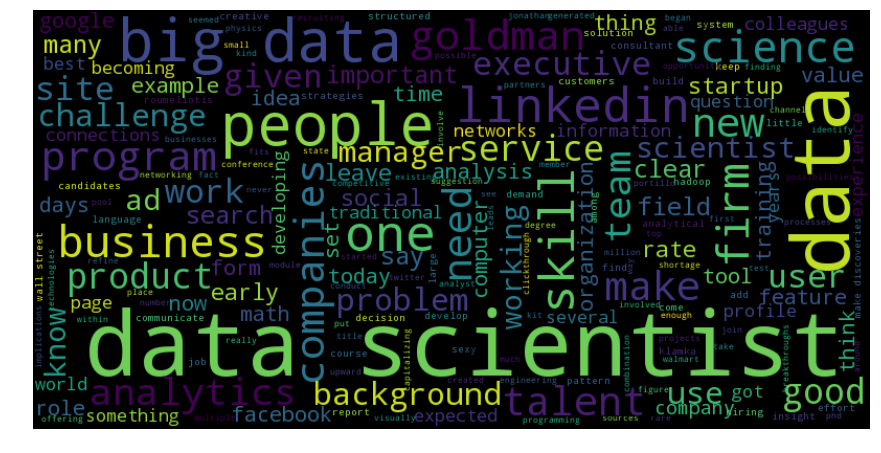

In [17]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Finally, we can save our word cloud image.

In [18]:
wordcloud.to_file('mySimpleWordCloud.png')